# Mitzie Irene Conchada

301258577

Use python to create a 2D CNN classifier model that can identify different images in CIFAR-10 dataset. This dataset consists of 60000 32x32 color images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More details about this dataset can be found in: https://www.cs.toronto.edu/~kriz/cifar.html

1. Import all the necessary libraries, read the dataset from Keras libraries using cifar10.load_data(). Normalize all the train and test images by dividing with 255.0. Employ one hot encoding for class labels in the train and test data.

In [ ]:
import tensorflow as tf
import keras
from tensorflow import keras
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [ ]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)


x_train shape: (50000, 32, 32, 3) y_train shape: (50000, 1)


In [ ]:
# Normalize the images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


In [ ]:
print("Number of train data - " + str(len(x_train)))
print("Number of test data - " + str(len(x_test)))

Number of train data - 50000
Number of test data - 10000


In [ ]:
# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Reshape input data from (32, 32) to (32, 32, 3)
w, h = 32, 32
x_train = x_train.reshape(x_train.shape[0], w, h, 3)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 3)
x_test = x_test.reshape(x_test.shape[0], w, h, 3)

#save the original values of labels in other variables
y_tr_org = np.copy(y_train)
y_val_org = np.copy(y_valid)
y_tst_org = np.copy(y_test)

# One-hot encode the labels
y_train = keras.utils.to_categorical(y_train, 10)
y_valid = keras.utils.to_categorical(y_valid, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Print training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (45000, 32, 32, 3) y_train shape: (45000, 10)
45000 train set
5000 validation set
10000 test set


2. Build a 2D CNN classifier model using Sequential API having the following parameters:

• Three Conv2D layers

• Layer 1 has 32 neurons, input_shape= (32,32, 3)

• Layer 2 has 64 neurons

• Layer 3 has 128 neurons

• All Conv2D layers must use relu activation

• Use a kernel_size= (3,3) in all the Conv2D layers

• Three MaxPooling2D layers (pool_size=(2,2)), alternating with Conv2D layers

• Flatten layer is followed by a fully connected (Dense) layer with 128 neurons and relu activation

• This is followed by a Dropout with a value 0.2.

• The last Dense layer is the output layer which uses softmax activation

In [ ]:
model = Sequential() #sequential API

# Convolutional layers
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Flatten layer
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# Take a look at the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 6, 6, 64)         

3. Compile the model using categorical crossentropy loss with Adam optimizer. The learning rate value must be 0.0001 and metric used is accuracy.

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])


4. Train the model with batch_size=128, epochs=100. Display the curves of loss and accuracy during training. Check if the model is overfitting or underfitting and comment on that in the colab notebook itself. Then save the model (in .h5 format) using model.save.

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("cifar10_model.h5", save_best_only=True)
history= model.fit(x_train,y_train,batch_size=128, epochs=100, validation_data=(x_valid, y_valid), callbacks=[checkpoint_cb])

Epoch 1/100
352/352 [==============================] - 64s 178ms/step - loss: 1.8318 - accuracy: 0.3184 - val_loss: 1.5003 - val_accuracy: 0.4722
Epoch 2/100


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


352/352 [==============================] - 63s 178ms/step - loss: 1.4455 - accuracy: 0.4733 - val_loss: 1.2862 - val_accuracy: 0.5428
Epoch 3/100
352/352 [==============================] - 62s 177ms/step - loss: 1.2898 - accuracy: 0.5358 - val_loss: 1.1761 - val_accuracy: 0.5806
Epoch 4/100
352/352 [==============================] - 62s 176ms/step - loss: 1.1963 - accuracy: 0.5742 - val_loss: 1.0602 - val_accuracy: 0.6280
Epoch 5/100
352/352 [==============================] - 61s 175ms/step - loss: 1.1242 - accuracy: 0.6020 - val_loss: 0.9993 - val_accuracy: 0.6518
Epoch 6/100
352/352 [==============================] - 61s 173ms/step - loss: 1.0672 - accuracy: 0.6223 - val_loss: 0.9764 - val_accuracy: 0.6608
Epoch 7/100
352/352 [==============================] - 61s 172ms/step - loss: 1.0154 - accuracy: 0.6414 - val_loss: 0.9285 - val_accuracy: 0.6732
Epoch 8/100
352/352 [==============================] - 61s 173ms/step - loss: 0.9739 - accuracy: 0.6563 - val_loss: 0.8868 - val_accurac

5. Evaluate the model on test data using several evaluation metrics such as accuracy, precision, F1 Score, and recall. Make a comparison of AUC values for each class depicted through an ROC graph.

In [34]:
model.save("cifar10_model.h5")
model.save_weights("cifar10_weights.ckpt")

In [35]:
history.params

{'verbose': 1, 'epochs': 100, 'steps': 352}

In [36]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

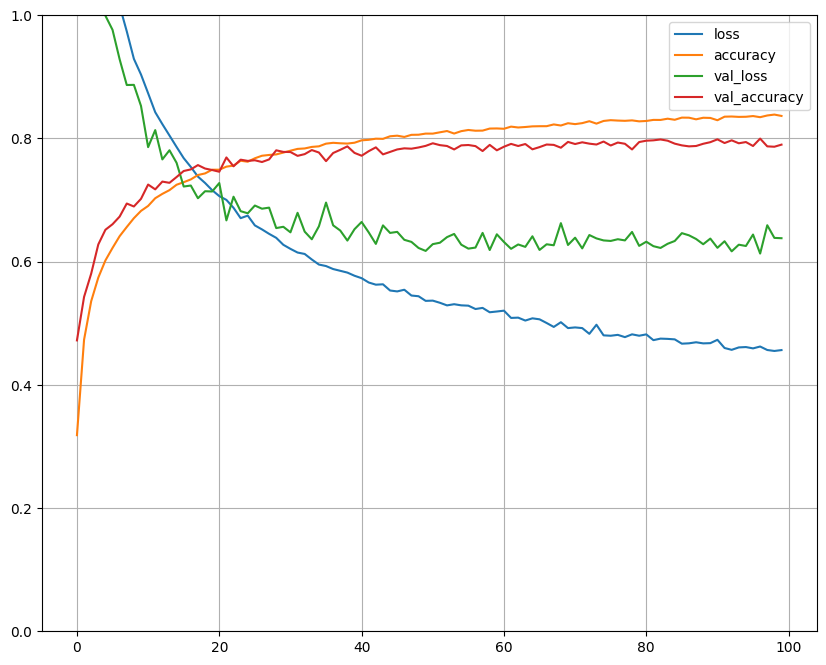

In [37]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(10, 8)) ### plot the loss curves
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

Test Accuracy and loss for pre-trained model

In [38]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6565172672271729
Test accuracy: 0.7831000089645386


In [39]:
###Evaluate the model performance on test data

X_new = x_test[:10] # pretend these are new instances
y_pred = np.argmax(model.predict(X_new), axis=-1)
print("\nPredictions:\n" ,y_pred) ## print predictions

y_new = y_tst_org [:10]
print("\nActual values:\n" , y_new) #print the actual labels for the first 10 observations

1/1 [==============================] - 0s 155ms/step

Predictions:
 [3 8 8 0 6 6 1 6 3 1]

Actual values:
 [[3]
 [8]
 [8]
 [0]
 [6]
 [6]
 [1]
 [6]
 [3]
 [1]]


Muti-Classification metrics using Confusion Matrix

In [40]:
from sklearn import metrics
from sklearn.metrics import  confusion_matrix

pred_all = np.argmax(model.predict(x_test), axis=-1)
cm = confusion_matrix(y_tst_org, pred_all)
cm ###multi classification, multiple classes (0-9)

313/313 [==============================] - 4s 14ms/step


array([[813,  17,  35,  19,  18,   7,   5,   9,  52,  25],
       [ 10, 881,   4,   9,   1,   6,  10,   1,  20,  58],
       [ 52,   5, 653,  73,  74,  59,  53,  17,   9,   5],
       [ 11,   4,  34, 715,  51, 107,  41,  24,   7,   6],
       [ 15,   2,  37,  87, 780,  18,  34,  23,   3,   1],
       [ 12,   0,  29, 214,  31, 665,  13,  34,   0,   2],
       [  7,   1,  33,  66,  30,  10, 841,   5,   7,   0],
       [  8,   2,  26,  57,  57,  78,   2, 754,   2,  14],
       [ 46,  18,   9,  19,   3,   3,   3,   4, 876,  19],
       [ 22,  47,   5,  15,   7,   8,   9,  11,  23, 853]])

Text(0.5, 427.9555555555555, 'Predicted label')

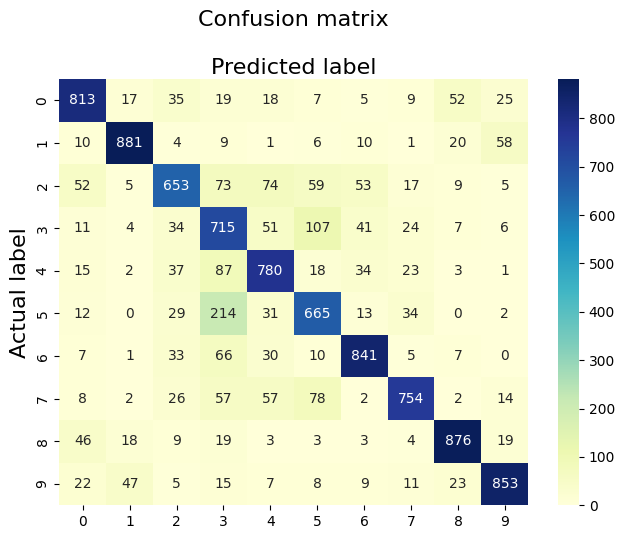

In [41]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

cls_names=[0,1,2,3,4,5,6,7,8,9] # name  of classes

fig, ax = plt.subplots()
ticks = np.arange(len(cls_names))
plt.xticks(ticks, cls_names)
plt.yticks(ticks, cls_names)

# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix\n', fontsize = 16)
plt.ylabel('Actual label',fontsize = 16)
plt.xlabel('Predicted label',fontsize = 16)

Finding the metrics for each class automatically based on classification report

In [42]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_tst_org, pred_all, target_names=['0', '1', '2','3','4','5','6','7','8','9']))


Classification Report

              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1000
           1       0.90      0.88      0.89      1000
           2       0.75      0.65      0.70      1000
           3       0.56      0.71      0.63      1000
           4       0.74      0.78      0.76      1000
           5       0.69      0.67      0.68      1000
           6       0.83      0.84      0.84      1000
           7       0.85      0.75      0.80      1000
           8       0.88      0.88      0.88      1000
           9       0.87      0.85      0.86      1000

    accuracy                           0.78     10000
   macro avg       0.79      0.78      0.78     10000
weighted avg       0.79      0.78      0.78     10000



Overall scores for the model

In [43]:
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_tst_org, pred_all)))

print('Micro Precision: {:.2f}'.format(precision_score(y_tst_org, pred_all, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_tst_org, pred_all, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_tst_org, pred_all, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_tst_org, pred_all, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_tst_org, pred_all, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_tst_org, pred_all, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_tst_org, pred_all, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_tst_org, pred_all, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_tst_org, pred_all, average='weighted')))




Accuracy: 0.78

Micro Precision: 0.78
Micro Recall: 0.78
Micro F1-score: 0.78

Macro Precision: 0.79
Macro Recall: 0.78
Macro F1-score: 0.78

Weighted Precision: 0.79
Weighted Recall: 0.78
Weighted F1-score: 0.78


ROC curve for individual classes

313/313 [==============================] - 5s 15ms/step


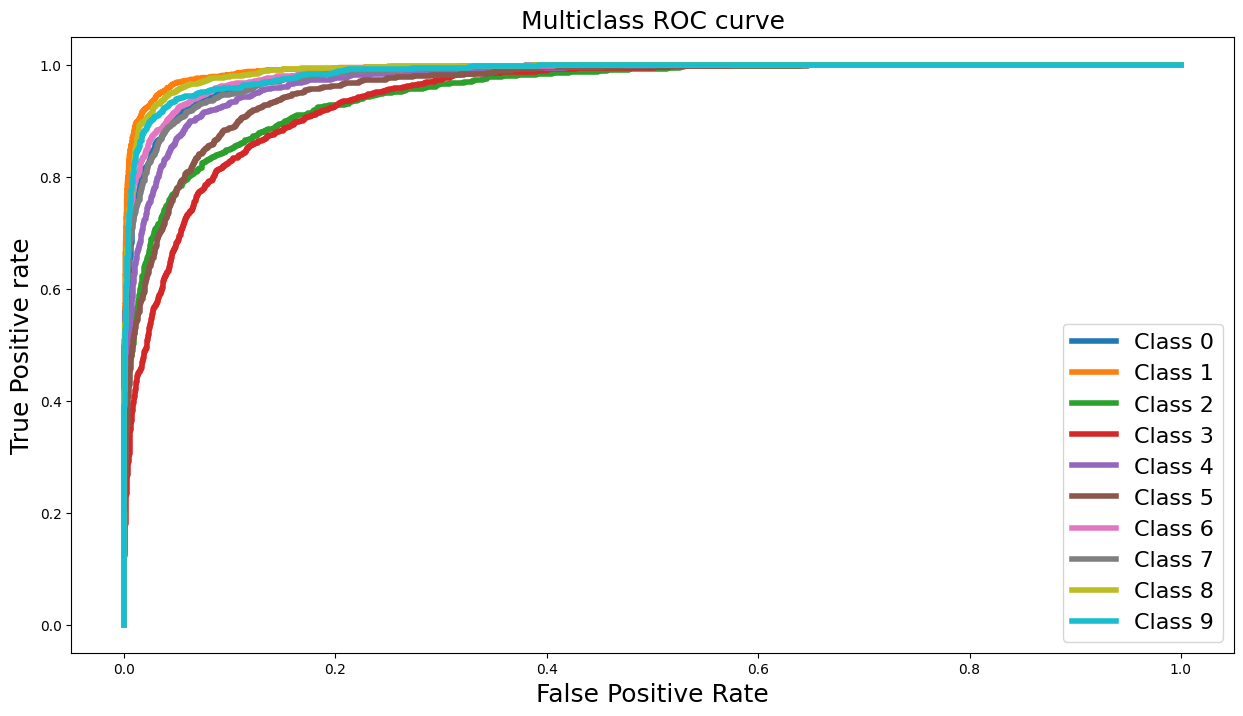

In [46]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr= {}
tpr = {}
thres ={}
n_class = 10

pred_prob = model.predict(x_test) #predict the probabilities for each class

for i in range(n_class): # iterate through the classes
    fpr[i], tpr[i], thres[i] = roc_curve(y_tst_org, pred_prob[:,i], pos_label=i) #call the roc_curve function

#set the figure size
figure = plt.figure(figsize=(15, 8))
# plotting
plt.plot(fpr[0], tpr[0],linewidth = 4, label='Class 0')
plt.plot(fpr[1], tpr[1],linewidth = 4,label='Class 1')
plt.plot(fpr[2], tpr[2],linewidth = 4,label='Class 2')
plt.plot(fpr[3], tpr[3],linewidth = 4,label='Class 3')
plt.plot(fpr[4], tpr[4],linewidth = 4, label='Class 4')
plt.plot(fpr[5], tpr[5],linewidth = 4, label='Class 5')
plt.plot(fpr[6], tpr[6],linewidth = 4,label='Class 6')
plt.plot(fpr[7], tpr[7],linewidth = 4,label='Class 7')
plt.plot(fpr[8], tpr[8],linewidth = 4,label='Class 8')
plt.plot(fpr[9], tpr[9],linewidth = 4, label='Class 9')

plt.title('Multiclass ROC curve',fontsize = 18)
plt.xlabel('False Positive Rate',fontsize = 18)
plt.ylabel('True Positive rate',fontsize = 18)
plt.legend(loc='best',fontsize = 16)

plt.show() #display the plot